# Sales Prediction System

In [2]:
#import all the required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###  <font color=darkblue>  Here I am fetching the data from csv files of the ongoing competition on Kaggle.</font>
> I downloaded the data to my local and used pandas read csv method

In [3]:
trainDf=pd.read_csv("C:/Users/manda/Downloads/Sales_Prediction/train.csv")
testDf=pd.read_csv("C:/Users/manda/Downloads/Sales_Prediction/test.csv")
storesDf=pd.read_csv("C:/Users/manda/Downloads/Sales_Prediction/stores.csv")
oilDf=pd.read_csv("C:/Users/manda/Downloads/Sales_Prediction/oil.csv")

In [4]:
print(trainDf.shape)
trainDf.head()

(3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
print(testDf.shape)
testDf.head()

(28512, 5)


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [6]:
print(storesDf.shape)
storesDf.head()

(54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
print(oilDf.shape)
oilDf.head()

(1218, 2)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


###  <font color=darkblue>Let's do some EDA.</font>


In [8]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [9]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [10]:
storesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [11]:
oilDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


###  <font color=darkblue>Observations</font>
>- We have 3M rows in Training data and 28K rows in Test data. Plz note that this training data is the final test data so for predictions on this data, we have to upload it to kaggle and see the results. For Validating our model I will create a Validation Test data(C.V. set) which will be 20% of the final training data.
>- We have to parse the dates in all dataframes.
>- We do have null values in our oil dataframe.
>- We can reset some of our indexes

In [12]:
#reset index to id column of traindf as both are same
trainDf.set_index('id',inplace=True,drop=True)

In [13]:
#reset index to store_nbr of storedf
storesDf.set_index('store_nbr',inplace=True,drop=True)

In [14]:
#lets parse dates from date column
trainDf.date=pd.to_datetime(trainDf.date)
oilDf.date=pd.to_datetime(oilDf.date)

In [15]:
#We have 43 null value, so lets fill them with next day values
oilDf.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [16]:
oilDf.fillna(method='bfill',inplace=True)

In [17]:
oilDf.isna().sum()

date          0
dcoilwtico    0
dtype: int64

### <font color=darkblue> Let's see some statistics</font>

In [18]:
trainDf.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [19]:
oilDf.describe()

,dcoilwtico
count,1218.000000
mean,67.673325
std,25.637345
min,26.190000
25%,46.422500
50%,53.185000
75%,95.595000
max,110.620000


###  <font color=darkblue>Observations</font>
>- Looks like we have lots of Zeros in our target column of sales(around 30%).
>- We may have some outliers as well in our traindf.
>- Oil data looks fine.


###  <font color=darkblue>Let's Visualize our data to get some insights</font>


In [20]:
# Let's check storesdf first
storesDf.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [21]:
storesDf.index #store numbers

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54],
           dtype='int64', name='store_nbr')

In [22]:
storesDf.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

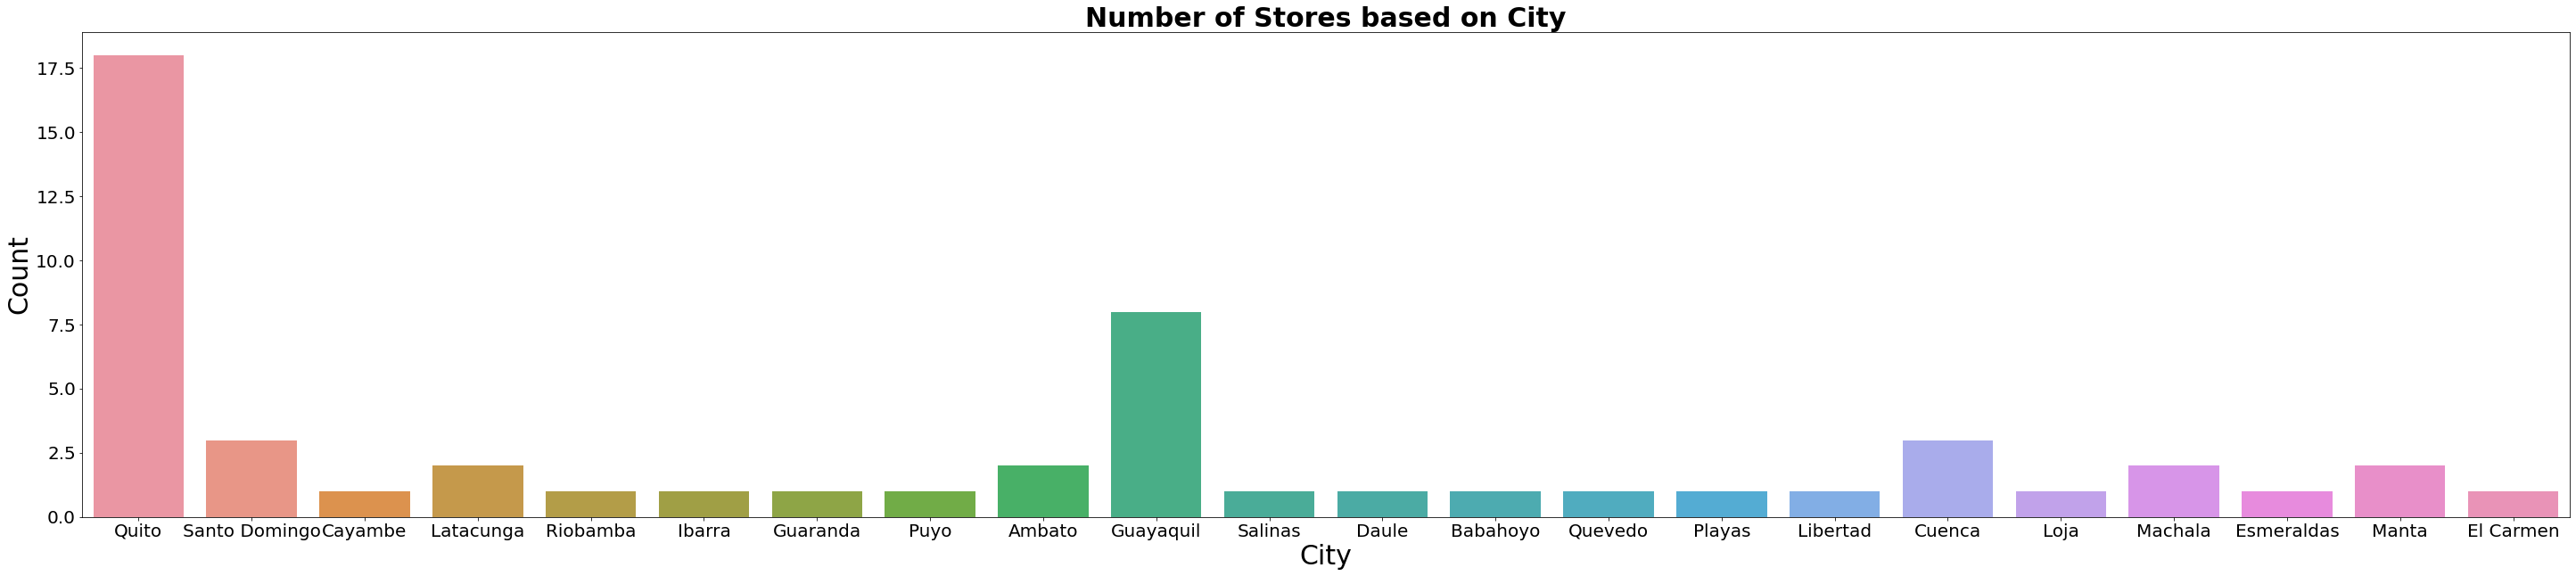

In [82]:
plt.figure(figsize=(50,10))
sns.countplot(x=storesDf.city);
plt.title('Number of Stores based on City',fontweight="bold",fontsize=30)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.tick_params(labelsize=20)

In [23]:
storesDf.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

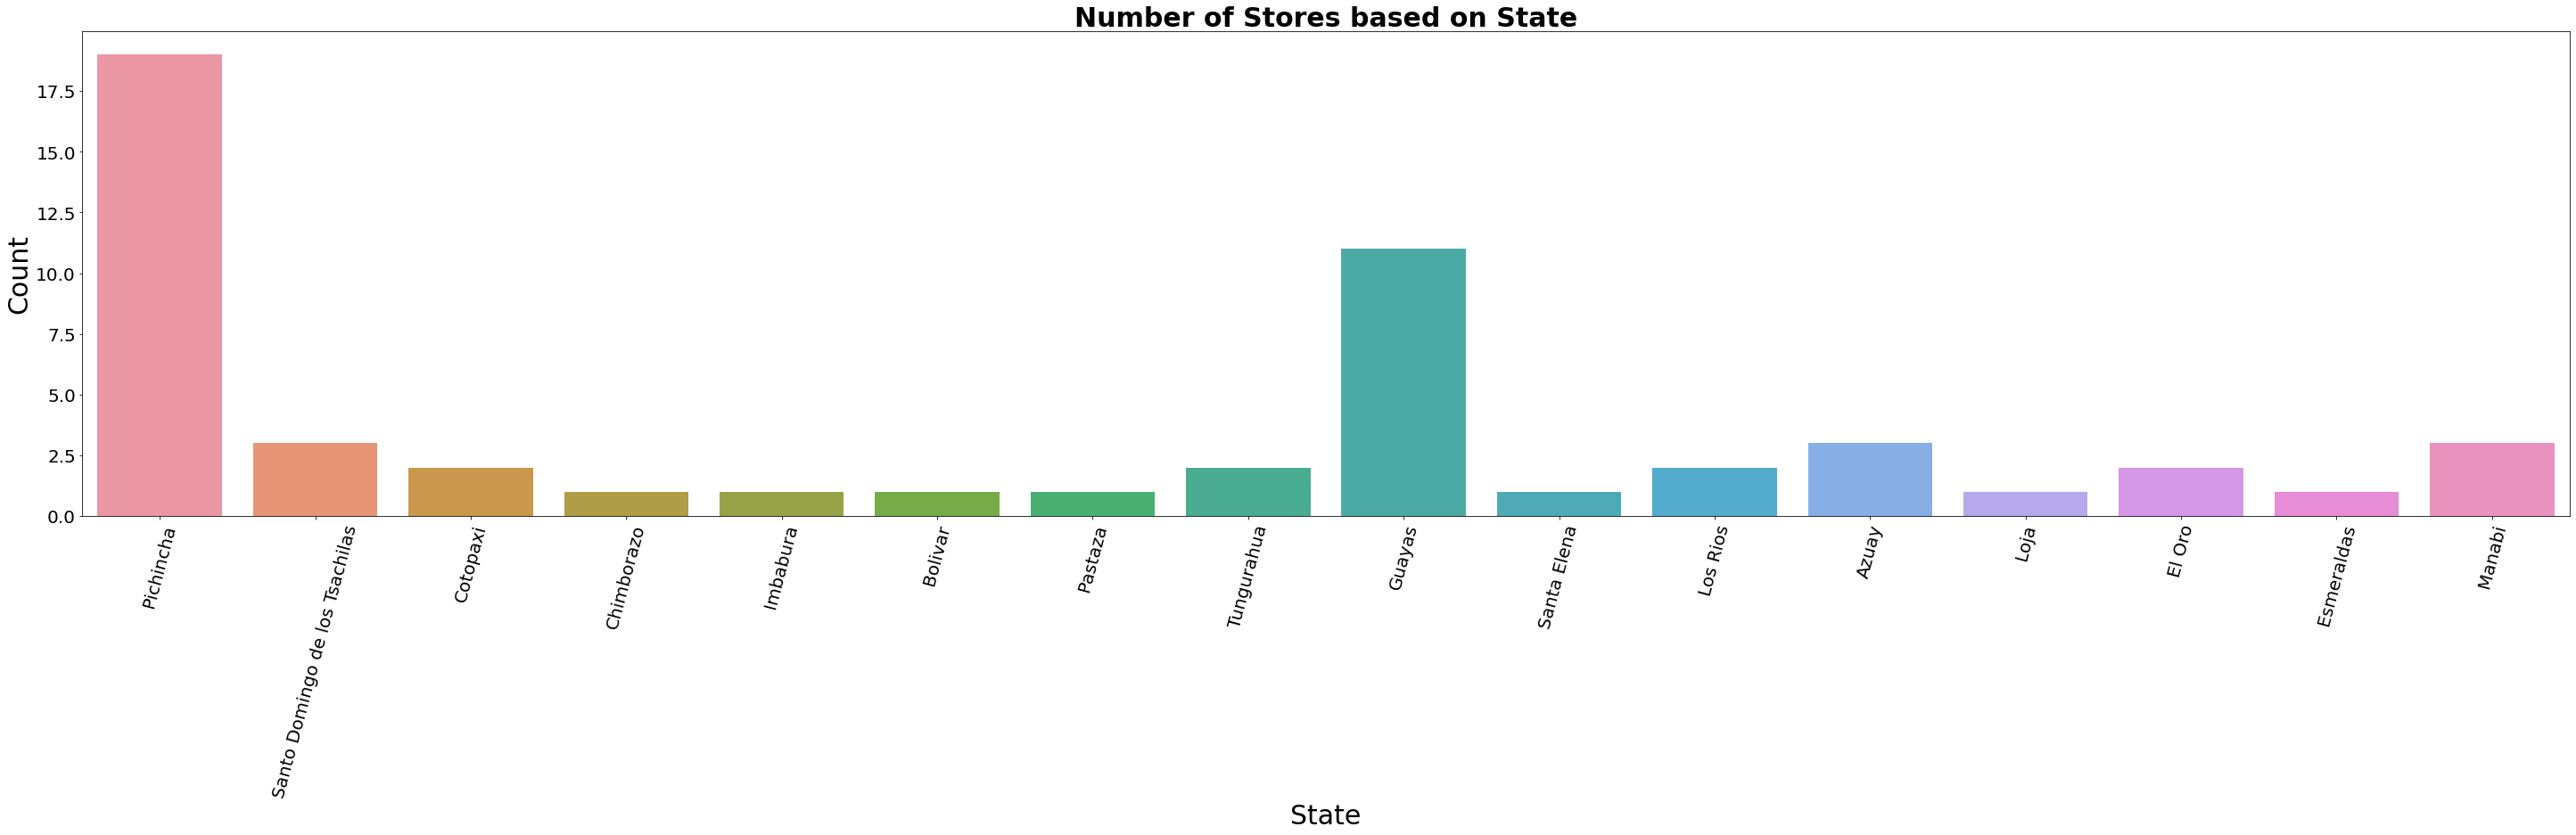

In [91]:
plt.figure(figsize=(50,10))
sns.countplot(x=storesDf.state);
plt.title('Number of Stores based on State',fontweight="bold",fontsize=30)
plt.xlabel('State',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation =75);

In [24]:
storesDf.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

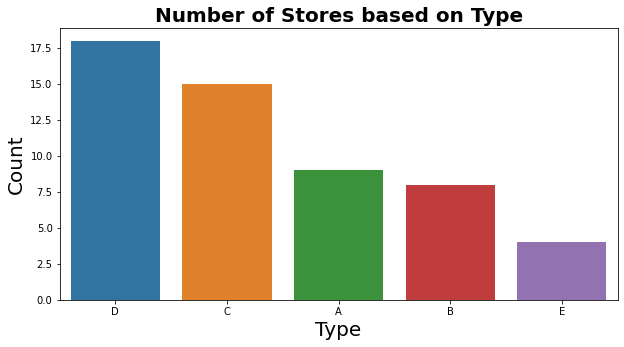

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(x=storesDf.type, order=storesDf.type.value_counts().index);
plt.title('Number of Stores based on Type',fontweight="bold",fontsize=20)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.tick_params(labelsize=10)


### <font color=darkblue>Note- We have to check correlation between sales and this stores data to consider any of these state,city or type as a feature

In [25]:
# Let's check oil data now
oilDf.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [26]:
# Let's rename dcoilwtico to cost bcz that is cost
oilDf.rename(columns={"dcoilwtico": "cost"},inplace=True)

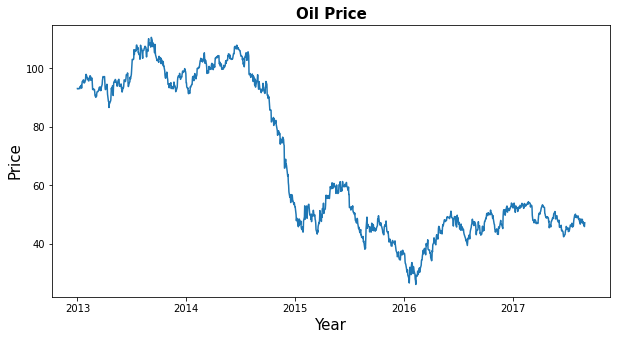

In [118]:
plt.figure(figsize=(10,5))
sns.lineplot(x='date',y='cost',data=oilDf);
plt.title('Oil Price',fontweight="bold",fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.tick_params(labelsize=10)

In [27]:
#Let's visualize our training data. We have to consider random sample in some case bcz its a huge data.
trainDf.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [28]:
trainDf.tail()

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,2017-08-15,9,SEAFOOD,16.000,0


In [29]:
trainDf.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

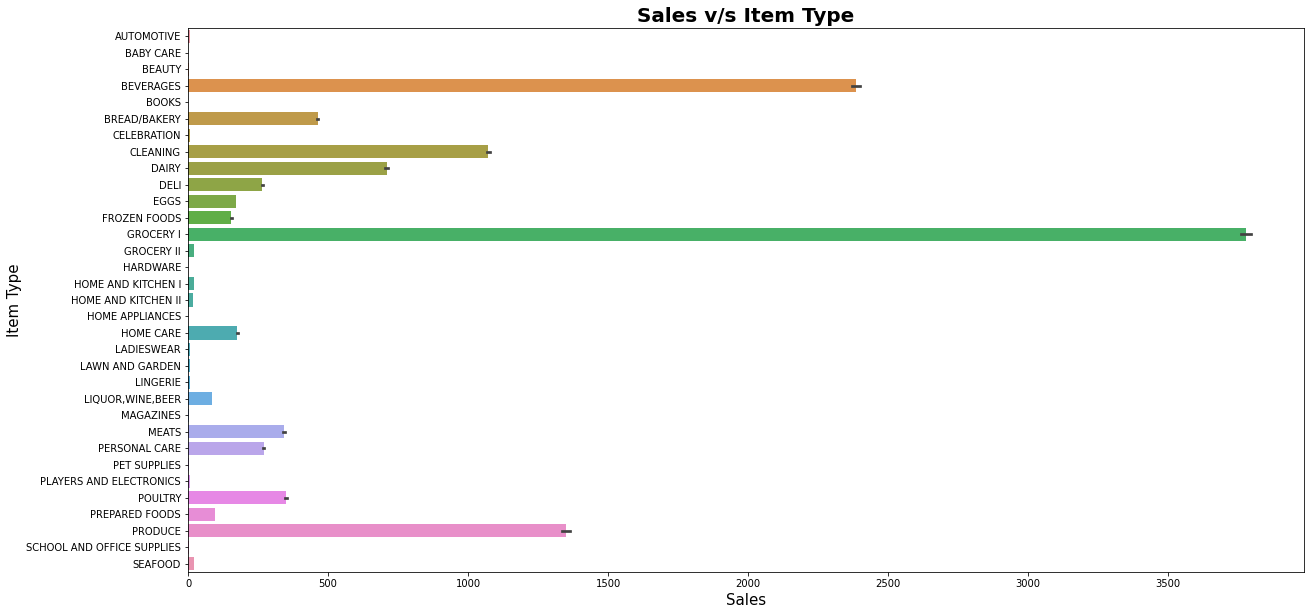

In [140]:
plt.figure(figsize=(20,10))
sns.barplot(x='sales',y='family',data=trainDf,orient='h');
plt.title('Sales v/s Item Type',fontweight="bold",fontsize=20)
plt.xlabel('Sales',fontsize=15)
plt.ylabel('Item Type',fontsize=15)
plt.tick_params(labelsize=10)

In [30]:
#We should treat store number as a catogorical column
trainDf['store_nbr_obj']=trainDf.store_nbr.astype(str)

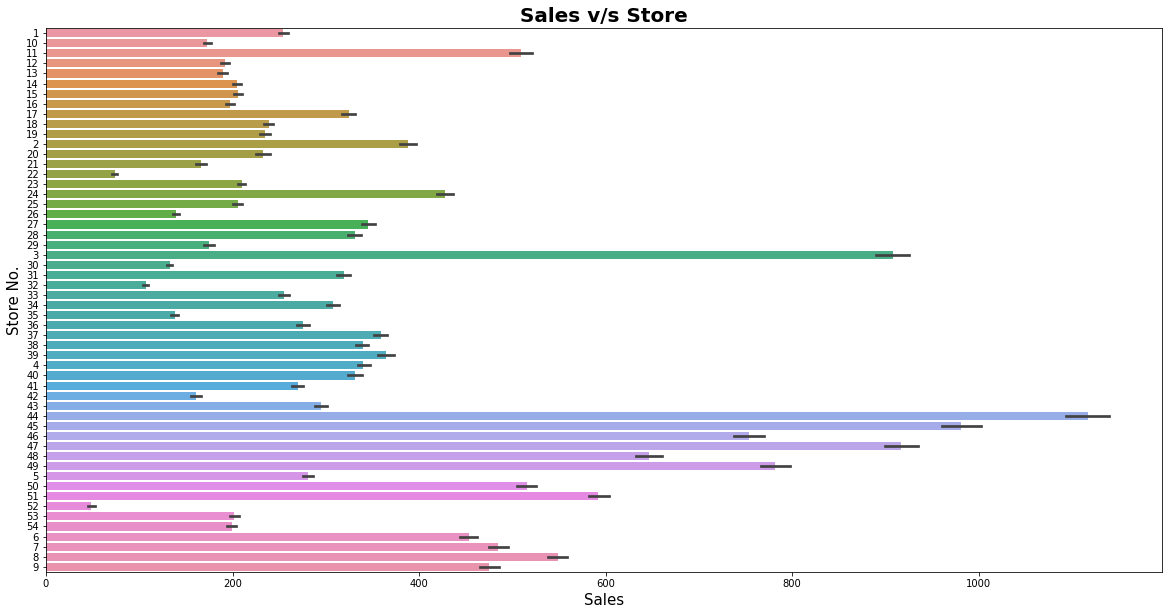

In [141]:
plt.figure(figsize=(20,10))
sns.barplot(x='sales',y='store_nbr_obj',data=trainDf,orient='h');
plt.title('Sales v/s Store',fontweight="bold",fontsize=20)
plt.xlabel('Sales',fontsize=15)
plt.ylabel('Store No.',fontsize=15)
plt.tick_params(labelsize=10)

In [31]:
# Let's take random sample of 10% from the data to visualize correlation b/w onpromotion and sales
strainDf=trainDf.sample(frac=0.1,random_state=42)

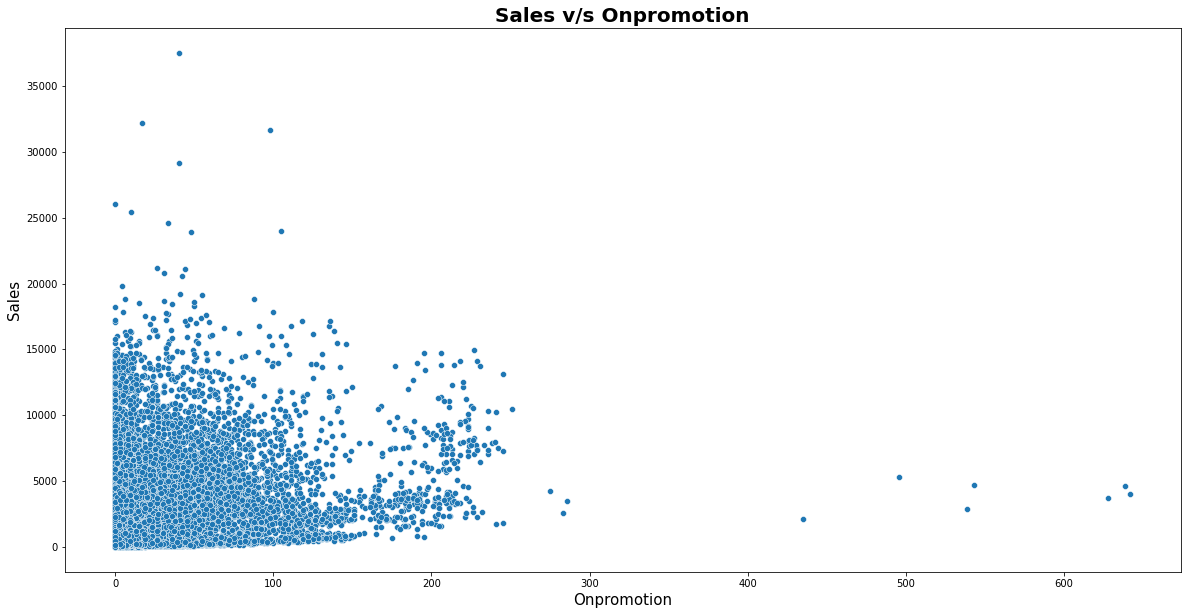

In [146]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='onpromotion',y='sales',data=strainDf);
plt.title('Sales v/s Onpromotion',fontweight="bold",fontsize=20)
plt.xlabel('Onpromotion',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.tick_params(labelsize=10)

#### Removing outliers for visualization 

In [32]:
strainDf=strainDf.drop(strainDf[strainDf.onpromotion>250].index)

In [33]:
strainDf=strainDf.drop(strainDf[strainDf.sales>25000].index)

C:\Users\manda\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


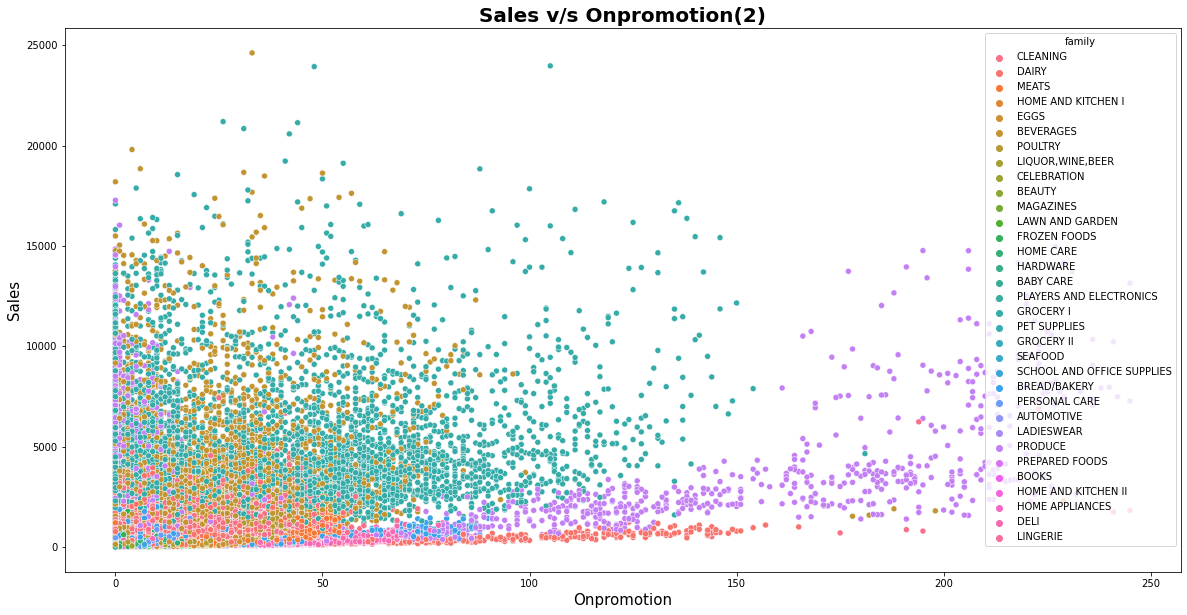

In [155]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='onpromotion',y='sales',data=strainDf,hue='family');
plt.title('Sales v/s Onpromotion(2)',fontweight="bold",fontsize=20)
plt.xlabel('Onpromotion',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.tick_params(labelsize=10)

#### Let's parse date into year,month and day

In [34]:
def add_dateparts(df,col):
    df[col+'year']=df[col].dt.year
    df[col+'month']=df[col].dt.month
    df[col+'day']=df[col].dt.day
    df[col+'weekday']=df[col].dt.weekday

In [35]:
add_dateparts(trainDf,'date')

In [36]:
trainDf.head()

,date,store_nbr,family,sales,onpromotion,store_nbr_obj,dateyear,datemonth,dateday,dateweekday
id,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,1,1,1
1,2013-01-01,1,BABY CARE,0.0,0,1,2013,1,1,1
2,2013-01-01,1,BEAUTY,0.0,0,1,2013,1,1,1
3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,1,1,1
4,2013-01-01,1,BOOKS,0.0,0,1,2013,1,1,1


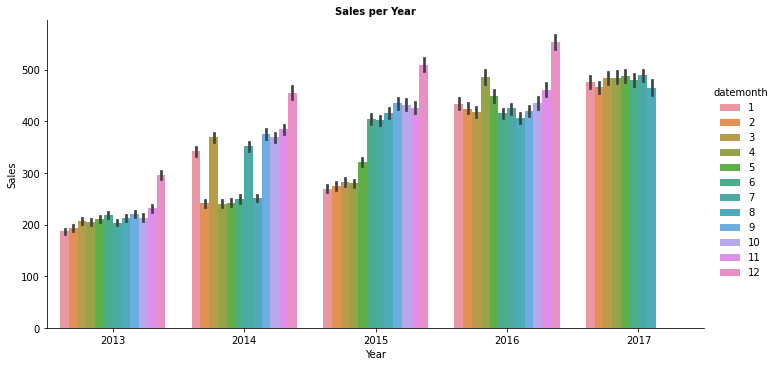

In [174]:
sns.catplot(x='dateyear',y='sales',data=trainDf,hue='datemonth',kind='bar',aspect=20/10);
plt.title('Sales per Year',fontweight="bold",fontsize=10)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Sales',fontsize=10)
plt.tick_params(labelsize=10)

In [37]:
mtrainDf=trainDf.merge(storesDf,left_on='store_nbr',right_on=storesDf.index)

In [38]:
mtrainDf.head()

,date,store_nbr,family,sales,onpromotion,store_nbr_obj,dateyear,datemonth,dateday,dateweekday,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,1,1,1,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,1,2013,1,1,1,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,1,2013,1,1,1,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,1,1,1,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,1,2013,1,1,1,Quito,Pichincha,D,13


In [39]:
mtrainDf.city.value_counts()

Quito            1000296
Guayaquil         444576
Santo Domingo     166716
Cuenca            166716
Latacunga         111144
Manta             111144
Machala           111144
Ambato            111144
Quevedo            55572
Esmeraldas         55572
Loja               55572
Libertad           55572
Playas             55572
Daule              55572
Babahoyo           55572
Cayambe            55572
Salinas            55572
Puyo               55572
Guaranda           55572
Ibarra             55572
Riobamba           55572
El Carmen          55572
Name: city, dtype: int64

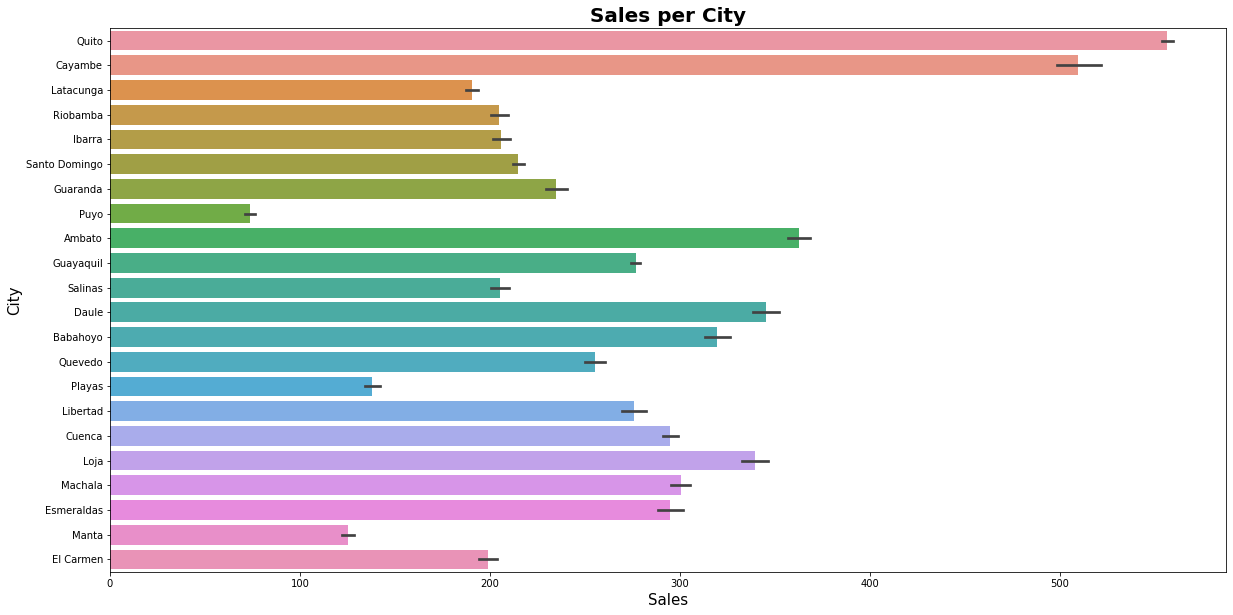

In [213]:
plt.figure(figsize=(20,10))
sns.barplot(x='sales',y='city',data=mtrainDf,orient='h');
plt.title('Sales per City',fontweight="bold",fontsize=20)
plt.xlabel('Sales',fontsize=15)
plt.ylabel('City',fontsize=15)
plt.tick_params(labelsize=10)

In [40]:
mtrainDf.state.value_counts()

Pichincha                         1055868
Guayas                             611292
Santo Domingo de los Tsachilas     166716
Azuay                              166716
Manabi                             166716
Cotopaxi                           111144
Tungurahua                         111144
Los Rios                           111144
El Oro                             111144
Chimborazo                          55572
Imbabura                            55572
Bolivar                             55572
Pastaza                             55572
Santa Elena                         55572
Loja                                55572
Esmeraldas                          55572
Name: state, dtype: int64

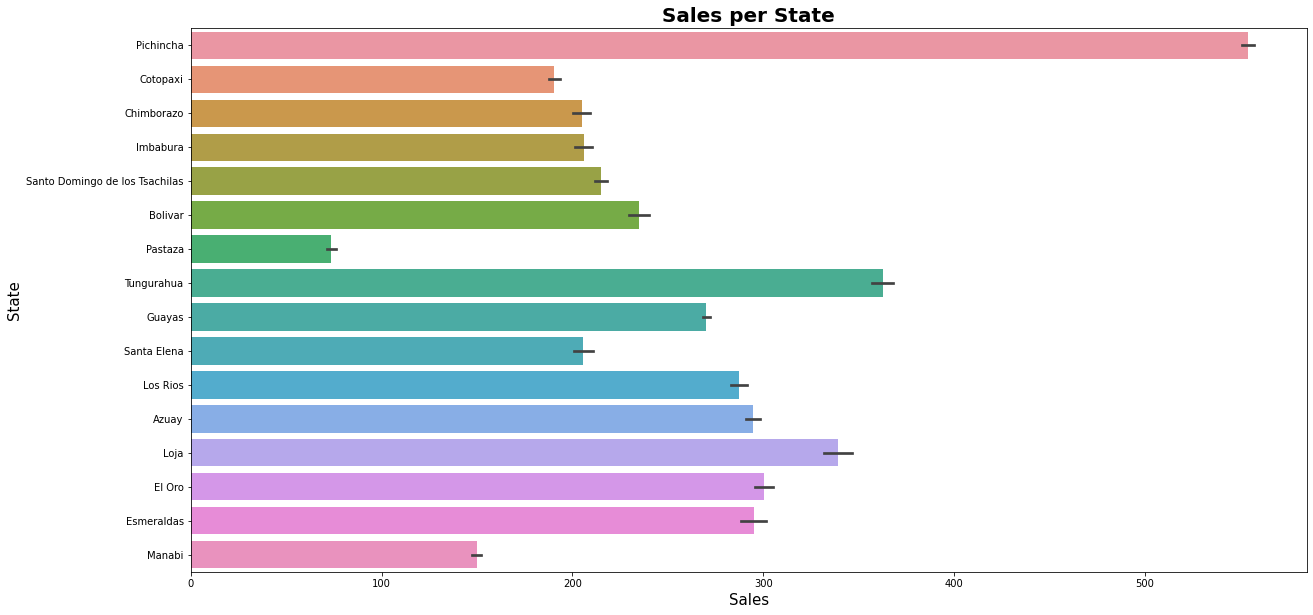

In [204]:
plt.figure(figsize=(20,10))
sns.barplot(x='sales',y='state',data=mtrainDf,orient='h',order=mtrainDf.sort_values('sales',ascending=False).state);
plt.title('Sales per State',fontweight="bold",fontsize=20)
plt.xlabel('Sales',fontsize=15)
plt.ylabel('State',fontsize=15)
plt.tick_params(labelsize=10)

In [41]:
mtrainDf.type.value_counts()

D    1000296
C     833580
A     500148
B     444576
E     222288
Name: type, dtype: int64

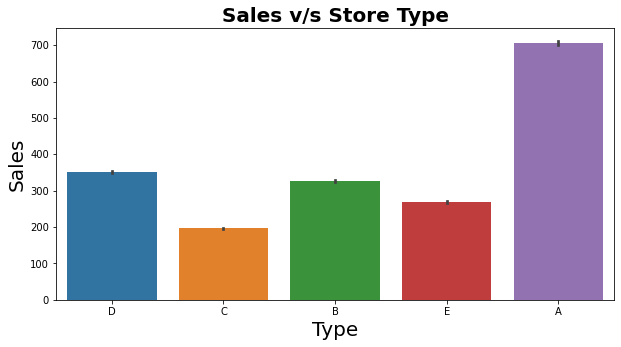

In [214]:
plt.figure(figsize=(10,5))
sns.barplot(x='type', y='sales',data=mtrainDf);
plt.title('Sales v/s Store Type',fontweight="bold",fontsize=20)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.tick_params(labelsize=10)

In [115]:
# Not able to merge oil data as size is huge. Will merge after dropping some columns and taking sample of 10% from data
#fmtrainDf=mtrainDf.merge(oilDf,on='date',how='left')

### <font color=darkblue>Observations<font>
>- Sales depend on item type. Same count for each type but high variations.
>- Sales depend on store as well. Same count but medium variations.
>- Sales does not depend on onpromotion apparently. Going to drop it.
>- Sales have increased over the years. For better predictions we should consider data of 2016 and 2017 only.
>- From city and state we have to chose one as feature. Going to chose city as state is comprised of 2 or more cities and within cities itself we have variation.
>- Type of store is also affecting sales. A type has small no. of stores but large sales.
>- Also oil prices hit lows in the 2016-2017 and sales go high. We have to include oil price in our model

### <font color=darkblue>Data preparation for Model Training</font>

In [205]:
mtrainDf.to_csv('C:/Users/manda/Downloads/GpuTrainDf.csv')

In [46]:
#Drop store_nbr,onpromotion,state,cluster
mtrainDf=mtrainDf.drop(['store_nbr','onpromotion','state','cluster'],axis=1)

In [119]:
#Get the years 2016 and 2017
finalTrainDf=mtrainDf.loc[mtrainDf[mtrainDf.dateyear>2015].index]

In [120]:
#Get 10% of sample data. 10% only bcz we are going to do one hot encoder on 4 columns and they have so many types.
finalTrainDf=finalTrainDf.sample(frac=0.1)

In [121]:
# merge now oil price data to our final train data
finalTrainDf=finalTrainDf.merge(oilDf,on='date',how='left')

In [122]:
finalTrainDf.cost=finalTrainDf.cost.fillna(method='ffill')# fill NA values with forward fill

In [124]:
finalTrainDf.cost=finalTrainDf.cost.fillna(method='bfill')# fill NA values with back fill

In [125]:
finalTrainDf.info()# we have no null values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105494 entries, 0 to 105493
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           105494 non-null  datetime64[ns]
 1   family         105494 non-null  object        
 2   sales          105494 non-null  float64       
 3   store_nbr_obj  105494 non-null  object        
 4   dateyear       105494 non-null  int64         
 5   datemonth      105494 non-null  int64         
 6   dateday        105494 non-null  int64         
 7   dateweekday    105494 non-null  int64         
 8   city           105494 non-null  object        
 9   type           105494 non-null  object        
 10  cost           105494 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 9.7+ MB


In [126]:
finalTrainDf.head()

,date,family,sales,store_nbr_obj,dateyear,datemonth,dateday,dateweekday,city,type,cost
0,2017-03-26,PERSONAL CARE,104.0,35,2017,3,26,6,Playas,C,48.81
1,2017-08-11,CELEBRATION,27.0,25,2017,8,11,4,Salinas,D,48.81
2,2017-03-20,PREPARED FOODS,67.0,22,2017,3,20,0,Puyo,C,47.79
3,2016-09-03,LINGERIE,2.0,54,2016,9,3,5,El Carmen,C,47.79
4,2016-05-29,EGGS,603.0,3,2016,5,29,6,Quito,D,47.79


In [129]:
finalTrainDf.describe()# As we can see we have outliers in our data we should get rid of outliers

,sales,dateyear,datemonth,dateday,dateweekday,cost
count,105494.000000,105494.000000,105494.000000,105494.000000,105494.000000,105494.000000
mean,458.448755,2016.380353,5.651260,15.511792,2.998417,45.519634
std,1323.925022,0.485476,3.202179,8.805869,2.001376,6.447576
min,0.000000,2016.000000,1.000000,1.000000,0.000000,26.190000
25%,2.000000,2016.000000,3.000000,8.000000,1.000000,43.340000
50%,24.000000,2016.000000,5.000000,15.000000,3.000000,46.830000
75%,262.969005,2017.000000,8.000000,23.000000,5.000000,49.760000
max,63434.000000,2017.000000,12.000000,31.000000,6.000000,54.480000


In [130]:
finalTrainDf=finalTrainDf.drop(finalTrainDf[finalTrainDf.sales>2000].index)

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [82]:
#Using column transformer for onehotencoding
transformer=ColumnTransformer(transformers=[('tnf1'
                ,OneHotEncoder(sparse=False,drop='first')
                ,['family','store_nbr_obj','city','type'])],remainder='passthrough')

In [83]:
from sklearn.model_selection import train_test_split

In [131]:
#Let's split our data into train and validation set and then transform
X_train,X_test,y_train,y_test=train_test_split(finalTrainDf.drop(['sales','date'],axis=1),finalTrainDf.sales,test_size=0.2)

In [132]:
X_train=transformer.fit_transform(X_train)

In [133]:
X_train[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [134]:
X_test=transformer.fit_transform(X_test)

In [135]:
X_test[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

### <font color=darkblue>Train our Model</font>

In [93]:
from sklearn.metrics import mean_squared_error#we check check our model based on root mean square error

In [92]:
def rmse(targets,preds):
    return mean_squared_error(targets,preds,squared=False)

#### Linear Regression Model

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr=LinearRegression()

In [136]:
lr.fit(X_train,y_train)

LinearRegression()

In [137]:
linear_pr=lr.predict(X_test)

In [138]:
rmse(y_test,linear_pr)#We have high value of rmse with linear regression model

187.03343471553458

#### Linear Regression with Regularization(Ridge)

In [140]:
from sklearn.linear_model import Ridge

In [141]:
rmodel=Ridge()

In [142]:
rmodel.fit(X_train,y_train)

Ridge()

In [143]:
linear_ridge_pr=rmodel.predict(X_test)

In [146]:
rmse(y_test,linear_ridge_pr)#Very minute changes ,means our model is underfitting, which should be the case bcz its a linear model. But this error we have only with 10% of data.
#and as we now underfitting problem can be reduced when we have more test data, which we have.

187.00837293517782

#### RandomForest Model

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
rfmodel=RandomForestRegressor(max_depth=10,n_jobs=-1)

In [153]:
rfmodel.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [154]:
random_forest_pr=rfmodel.predict(X_test)

In [155]:
rmse(y_test,random_forest_pr)

145.84064345629326

#### Gradient Boosting(XGBoost)

In [160]:
from xgboost import XGBRegressor

In [161]:
xgmodel=XGBRegressor(max_depth=10,objective='reg:squarederror',
                     n_estimators=100,n_jobs=-1)

In [162]:
xgmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [163]:
xgboost_pr=xgmodel.predict(X_test)

In [165]:
rmse(y_test,xgboost_pr)# This is very nice compared to other models
#This is our best model

77.9612999087822

### <font color=darkblue>Tune Parameters</font>

In [170]:
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [171]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

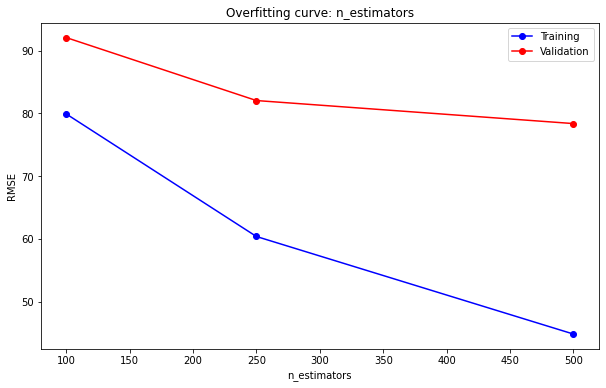

In [172]:
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

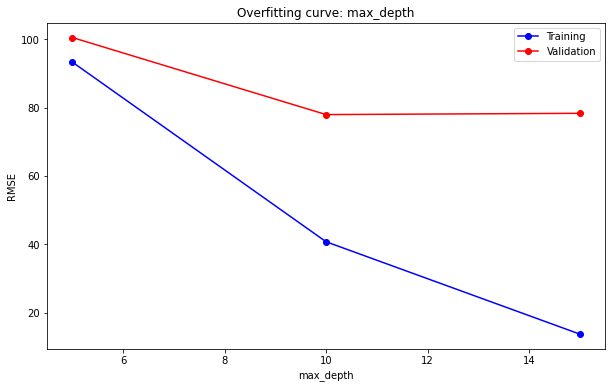

In [174]:
test_param_and_plot(XGBRegressor, 'max_depth', [5,10,15], **best_params)

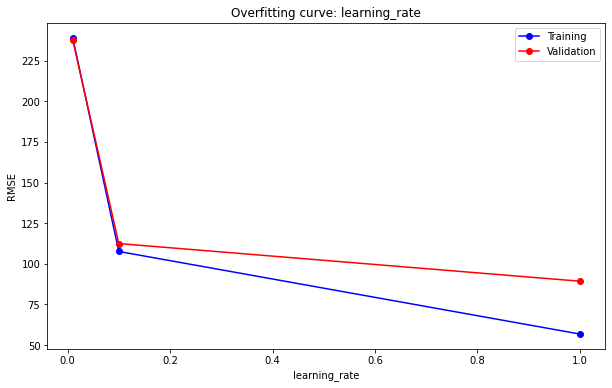

In [175]:
test_param_and_plot(XGBRegressor, 'learning_rate', [0.01, 0.1, 1], **best_params)

In [199]:
# We have our best parameters let's train our model on that
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=250, max_depth=10, learning_rate=0.3)

In [200]:
xgb_model_final.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=250,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [201]:
xgboostfinal_pr=xgb_model_final.predict(X_test)

In [339]:
rmse(y_test,xgboostfinal_pr)# A little better results just by choosing right parameters value

76.72727472268213

## Conclusion
>- We found our best model with Gradient Boosting and tuning some parameters. RMSE reduced to 76.72

## Misc.
>- We haven't use the testdf. testdf does not has sales column, so to get the rmse(pricisely rmsle) we have to upload it to kaggle with our predictions value.
Let's do that

In [315]:
testDf=pd.read_csv("C:/Users/manda/Downloads/Sales_Prediction/test.csv")

In [316]:
testDf.date=pd.to_datetime(testDf.date)

In [317]:
testDf['store_nbr_obj']=testDf.store_nbr.astype(str)

In [318]:
add_dateparts(testDf,'date')

In [319]:
testDf.drop(['id','onpromotion'],axis=1,inplace=True)

In [320]:
finalTrainDf.head(1)

,date,family,sales,store_nbr_obj,dateyear,datemonth,dateday,dateweekday,city,type,cost_x,cost_y
0,2017-03-26,PERSONAL CARE,104.0,35,2017,3,26,6,Playas,C,48.81,NaN


In [321]:
testDf.head(1)

,date,store_nbr,family,store_nbr_obj,dateyear,datemonth,dateday,dateweekday
0,2017-08-16,1,AUTOMOTIVE,1,2017,8,16,2


In [322]:
testDf=testDf.merge(storesDf,left_on='store_nbr',right_on=storesDf.index)

In [323]:
testDf.drop('store_nbr',inplace=True,axis=1)

In [324]:
testDf.drop(['cluster','state'],inplace=True,axis=1)

In [325]:
testDf.head(1)

,date,family,store_nbr_obj,dateyear,datemonth,dateday,dateweekday,city,type
0,2017-08-16,AUTOMOTIVE,1,2017,8,16,2,Quito,D


In [326]:
testDf=testDf.merge(oilDf,on='date',how='left')

In [327]:
testDf.drop('date',inplace=True,axis=1)

In [328]:
trtestDf=transformer.fit_transform(testDf)

In [329]:
trtestDf.shape

(28512, 115)

In [330]:
test_pr=xgb_model_final.predict(trtestDf)

In [332]:
fs=pd.Series(test_pr)

In [337]:
fs.where(fs>0,0,inplace=True)#Cannot take Root Mean Squared Logarithmic Error of negative value

In [338]:
fs.to_csv('C:/Users/manda/Downloads/testkegglesubmission.csv')

## Bonus
>- I also used prophet for forcasting as well.That will be in different notebook.
>- It is not able to predict good values as it takes date and target column only and then show predictions.
>- But it shows good trends in the data.
>- Also deployed complete data and train model on GPU using Google Colab. RMSE error is 65.27